## LSTM - Multivariate Forecasting

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
plt.style.use("ggplot")

In [2]:
# Load the time-series of the Yemen country (FCS indicator) with which to do forecasting of the time-series.
ts_fcs = pd.read_excel("ts_fcs.xlsx", index_col = 0, parse_dates = True)
ts_fcs.columns.name = "AdminStrata"
ts_fcs.head()

AdminStrata,Abyan,Ad Dali,Aden,Al Bayda,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amran,Dhamar,...,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'dah,Sana'a,Sana'a City,Shabwah,Taizz
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-30,34.100,57.43,21.22,32.76,32.28,37.97,18.00,34.38,46.82,51.76,...,52.04,48.10,41.31,61.71,62.84,46.230000,38.25,33.43,35.22,55.37
2015-10-31,40.145,54.33,38.02,46.39,37.67,49.74,25.00,34.56,45.05,58.15,...,54.73,46.12,37.69,49.25,60.59,44.811429,40.24,36.76,42.42,57.60
2015-11-30,46.190,56.44,27.95,52.56,32.65,56.74,35.56,39.38,58.51,55.58,...,51.95,51.04,30.62,45.39,65.15,43.392857,29.66,35.96,42.41,59.83
2015-12-31,36.110,53.04,30.60,54.37,25.54,58.22,24.82,34.31,53.84,55.84,...,43.49,47.02,50.17,47.12,67.28,41.974286,50.51,42.51,51.00,55.53
2016-01-31,43.440,50.44,26.24,55.33,32.19,55.17,19.78,29.67,46.88,49.89,...,52.10,51.67,48.03,45.62,64.38,40.555714,52.91,38.82,57.95,62.71


In [3]:
# Load the time-series of the Yemen country (rCSI indicator) with which to do forecasting of the time-series.
ts_rcsi = pd.read_excel("ts_rcsi.xlsx", index_col = 0, parse_dates = True)
ts_rcsi.columns.name = "AdminStrata"
ts_rcsi.head()

AdminStrata,Abyan,Ad Dali,Aden,Al Bayda,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amran,Dhamar,...,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'dah,Sana'a,Sana'a City,Shabwah,Taizz
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-30,81.70,91.67,79.15,79.33,83.10,85.74,74.38,89.55,80.29,87.52,...,95.81,85.11,71.12,92.91,96.81,92.460000,86.89,83.86,69.22,88.64
2015-10-31,81.99,87.86,69.58,86.36,91.68,93.54,75.00,87.56,81.04,87.60,...,98.56,85.11,74.81,93.56,90.54,90.851429,89.29,82.34,71.59,89.67
2015-11-30,82.28,89.30,73.95,83.01,82.87,86.94,80.00,91.52,84.95,87.74,...,98.21,85.35,73.69,86.93,91.41,89.242857,80.14,79.27,72.87,90.70
2015-12-31,88.54,84.31,69.99,85.70,81.43,87.39,64.78,86.18,82.13,85.02,...,88.17,83.13,84.28,74.33,93.48,87.634286,87.85,80.77,77.00,87.09
2016-01-31,88.36,87.06,60.77,79.08,77.47,84.35,65.03,87.06,79.78,80.09,...,93.46,82.33,78.94,74.88,90.61,86.025714,81.97,76.88,80.97,86.21


### 1. Using the time-series of the FCS indicator, non-stationary, all influence each others

In [9]:
# Define the time-series to use for making the forecast analysis.
df = ts_fcs.copy()
print(len(df))
df.head()

49


AdminStrata,Abyan,Ad Dali,Aden,Al Bayda,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amran,Dhamar,...,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'dah,Sana'a,Sana'a City,Shabwah,Taizz
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-30,34.100,57.43,21.22,32.76,32.28,37.97,18.00,34.38,46.82,51.76,...,52.04,48.10,41.31,61.71,62.84,46.230000,38.25,33.43,35.22,55.37
2015-10-31,40.145,54.33,38.02,46.39,37.67,49.74,25.00,34.56,45.05,58.15,...,54.73,46.12,37.69,49.25,60.59,44.811429,40.24,36.76,42.42,57.60
2015-11-30,46.190,56.44,27.95,52.56,32.65,56.74,35.56,39.38,58.51,55.58,...,51.95,51.04,30.62,45.39,65.15,43.392857,29.66,35.96,42.41,59.83
2015-12-31,36.110,53.04,30.60,54.37,25.54,58.22,24.82,34.31,53.84,55.84,...,43.49,47.02,50.17,47.12,67.28,41.974286,50.51,42.51,51.00,55.53
2016-01-31,43.440,50.44,26.24,55.33,32.19,55.17,19.78,29.67,46.88,49.89,...,52.10,51.67,48.03,45.62,64.38,40.555714,52.91,38.82,57.95,62.71


In [19]:
# Let's define the number of future predictions (how much months in our case) we aim to forecast.
n_out = 1
dates_to_forecast = df.index[-n_out:]
print(dates_to_forecast.values)

['2019-09-30T00:00:00.000000000']


In [20]:
# Define the training and the test set.
num_train = len(df) - n_out        
df_train = df[:num_train]
df_test = df[num_train:] 
print(len(df_train))
print(len(df_test))

48
1


In [21]:
# n_in is the number of delay steps (shift) we want to have and consequently the number of inputs we want to have.
n_in = 2

In [37]:
def series_to_supervised(df, n_in = 1, n_out = 1):
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [("%s (t-%d)" % (name, i)) for name in df.keys()]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [("%s (t)" % (name)) for name in df.keys()]
        else:
            names += [("%s (t+%d)" % (name, i)) for name in df.keys()]
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    return agg

In [38]:
# Let's define the network to use for the forecasting purpose.
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.LSTM(50, activation = "relu"))
model.add(tf.keras.layers.Dense(1))
model.compile(loss = "mae", optimizer = "adam")

In [39]:
def time_series_to_keep(df, AdminStrata):
    time_series = list()
    # Add the time-series used as X.
    for i in range(n_in, -1, -1):
        if i > 0:
            time_series.extend(list(df_train.columns.values + " (t-" + str(i) + ")"))
    # Add the time-series used as y.
    time_series.append(AdminStrata + " (t)")
    return time_series

In [40]:
def LSTM_model(column):
    AdminStrata = column.name
    # Let's isolate the variable useful to forecast the current AdminStrata.
    time_series = time_series_to_keep(df_train_lstm, AdminStrata)
    new_df = df_train_lstm[time_series]  
    # Create training samples labeled.
    train_X, train_y = new_df.values[:, :-1], new_df.values[:, -1] # The last column is used as label.
    test_X = series_to_supervised(df_train.tail(n_in).append(pd.Series(), ignore_index = True), n_in).tail(1).dropna(axis = 1).values
    forse qua errore
    train_X = train_X.reshape((train_X.shape[0], n_in, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_in, n_features))
    # Let's train the network.
    history = model.fit(train_X, train_y, epochs = 200, batch_size = 32, verbose = 0, shuffle = False)
    # Make predictions.
    trainPredict = model.predict(train_X)
    testPredict = model.predict(test_X)
    # Invert scaling for forecast.
    test_X = test_X.reshape((test_X.shape[0], n_in*n_features))
    inv_yhat = np.concatenate((testPredict, test_X[:, -(train_X.shape[2] - 1):]), axis = 1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    
    return pd.Series(inv_yhat[0], index = [date_to_forecast], name = AdminStrata)

In [41]:
for i in range(n_out):
    # Let's make the prediction for this date.
    date_to_forecast = dates_to_forecast[i]
    # Let's define the parameter to define the training input of the LSTM network.
    n_features = len(df_train.keys()) 
    # I have to preprocess the data in order to set the values in range [0, 1].
    scaler = MinMaxScaler(feature_range = (0, 1))
    values = df_train.values.astype("float32")
    scaled = scaler.fit_transform(values)    
    df_train_lstm = df_train.copy()
    df_train_lstm[:] = scaled       
    # Now let's define the dataframe converted to the supervised problem.
    df_train_lstm = series_to_supervised(df_train_lstm, n_in)
    df_train_lstm.dropna(inplace = True)
    # Let's make one point prediction.
    new_row = df_train.apply(LSTM_model)
    df_train = df_train.append(new_row)

In [1]:
df_test_predict = df_train.loc[dates_to_forecast]
df_test_predict

NameError: name 'df_train' is not defined

In [35]:
def compute_mae(column): 
    admin = column.name
    mae = np.mean(np.abs(column - df_test[admin]))
    return mae

In [36]:
# Compute the total error of all the time-series predictions.
df_test_predict.apply(compute_mae).mean()

903.7584314776855

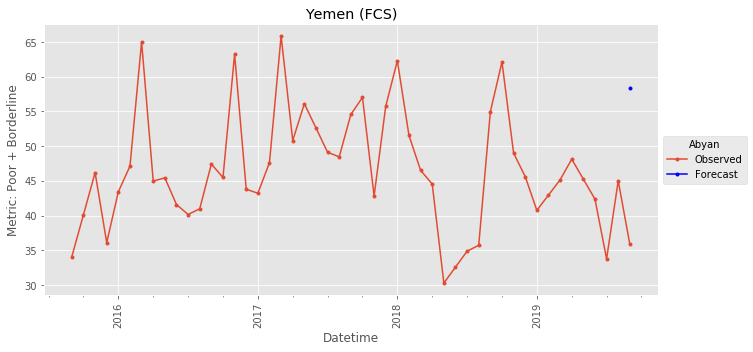

In [17]:
adminstrata = "Abyan"
# Example.
f = plt.figure(figsize = (11, 5))
plt.title("Yemen (FCS)", color = "black")
fig1 = df[adminstrata].copy()
fig2 = df_test_predict[adminstrata].copy()
fig1.name = "Observed"
fig2.name = "Forecast"
fig1.plot(ax = f.gca(), style = ".-")
fig2.plot(ax = f.gca(), style = ".-", c = "b")
plt.legend(title = adminstrata, loc = "center left", bbox_to_anchor = (1.0, 0.5))
plt.ylabel("Metric: Poor + Borderline")
plt.xticks(rotation = 90)
plt.autoscale()
plt.show()

In [49]:
tf.keras.layers.LSTM?